<a href="https://colab.research.google.com/github/jeanraisa/Capstone/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pregnancy Risk Prediction - Exploratory Data Analysis & Modeling**

**Introduction**

Pregancy is a transformative journey in a woman's life, filled with excitement and anticipation but  it also comes with various risks and challenges, both for the expectant mother and her unborn child. Predicting and managing these risks is crucial to ensuring a safe and healthy pregnancy.In this project, we are developing a machine learning-based pregnancy risk prediction model integrated into a mobile application. The system focuses on utilizing easily accessible health indicators such as age, blood pressure, HeartRate, SystolicBP, DiastolicBP, medical history, and reported symptoms. By leveraging data that can be self-reported or collected during routine check-ups, the model aims to provide early detection of pregnancy-related risks and enhance the prenatal care and well-being of pregnant women.




**Importing Required Libraries**

Before we dive into the analysis, we first import the necessary Python libraries that will help us handle data, perform computations, and visualize patterns effectively.

In [71]:
# Importing Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# to preprocess the data
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , mean_absolute_error  , mean_squared_error , r2_score

# to save the model
import pickle

**Loading the Pregnancy Risks Prediction Dataset**

This dataset is commonly used in pregnancy risks prediction studies and contains various physiological  attributes, such as:

* **Age**: Age in years when a woman is pregnant.
* **SystolicBP**: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **DiastolicBP**: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.
* **HeartRate**: A normal resting heart rate in beats per minute.
* **Risk Level**: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Let's read the data into pandas data frame display the first few rows to understand the structure of the data.

In [72]:
# Import that dataset into the notebook

df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

# Display the first few rows of the dataset
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


**Initial Data Exploration**

We will now explore the dataset to see if there are missing values, incorrect data types, or outliers that may need cleaning.

**Key Checks**

1. Preview the first few rows using `df.head()`.
2. Check dataset size using df.shape `(number of rows & columns)`.
3. Get column names and data types using `df.info()`.
4. Check for missing values using `df.isnull().sum()`.
5. Look at summary statistics using `df.describe()`.

In [73]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [74]:
df.shape

(1014, 7)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [76]:
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [77]:
df[df.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [78]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [79]:
df[df.Age > 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
114,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
322,65,90,60,6.9,98.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
338,70,85,60,6.9,102.0,70,low risk
339,65,120,90,6.9,103.0,76,low risk
435,65,130,80,15.0,98.0,86,high risk
502,63,140,90,15.0,98.0,90,high risk


In [80]:
len(df[df.Age < 13])

39

In [81]:
df.BodyTemp.value_counts()

,count
BodyTemp,
98.0,804
101.0,98
102.0,66
100.0,20
103.0,13
99.0,10
98.4,2
98.6,1


In [82]:
df[df.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


**Observation of Initial Data exploration**

* We have **1014 entries**, as well as **7 features**.
* The first 5 columns are stored as **integers** and **floats**, and the dtype of the last column (risk level) is object, which needs to be converted into numerical values for machine learning.
* **RiskLevel** will be our target or response variable and the rest of the features will be our predictor variables.
* There is **no null values**.
* There are a lot of **dulicated rows**.
* There is an observation with heart rate 7, which doesn't make sense. We will have to fix it. It looks like there are 2 observations, but it is actually one duplicated.

**Data cleaning**

In [83]:
df = df.drop_duplicates().reset_index(drop=True)

In [84]:
df.shape

(452, 7)

In [85]:
df.HeartRate.mode()

,HeartRate
0,70


In [86]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

In [87]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [88]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


**Exploratory Data Analysis**

Age Column

In [89]:
# Ensuring correct data type
df["Age"] = df["Age"].astype(int)

In [90]:
# look out for num values in the data set
df['Age'].isnull().sum()

np.int64(0)

In [91]:
# Get a statistical description of the age column
df['Age'].describe()

,Age
count,452.000000
mean,29.194690
std,13.767379
min,10.000000
25%,19.000000
50%,25.000000
75%,35.000000
max,70.000000


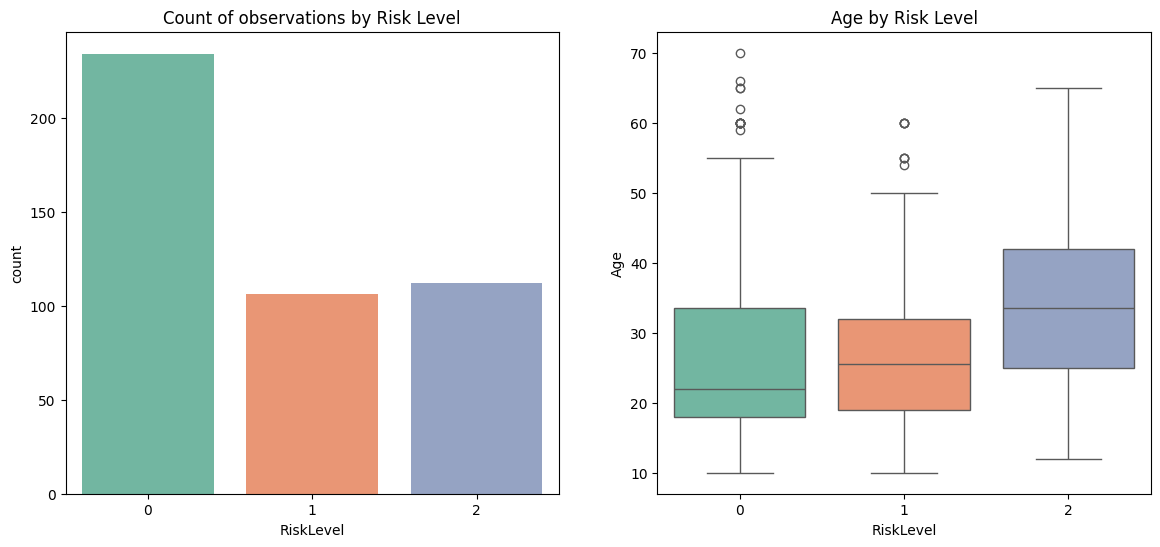

In [92]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.RiskLevel, palette='Set2')
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age, palette='Set2')
axes[1].set_title("Age by Risk Level");

Observations:

1. Age has no missing values in the data set.
2. Younger women tend to have low and mid risk pregnancies, while the pregnancies of women above 35 years old more often are classified as high risk, which means they need more attention.

Blood Glucose Level(BS) Column

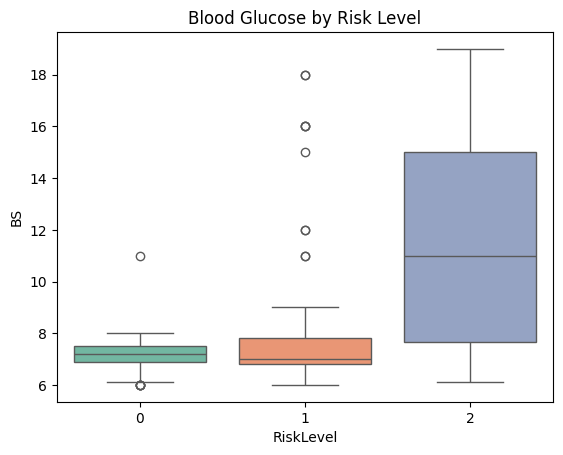

In [93]:
sns.boxplot(x=df.RiskLevel, y=df.BS, palette='Set2').set_title("Blood Glucose by Risk Level");

Blood Pressure Column

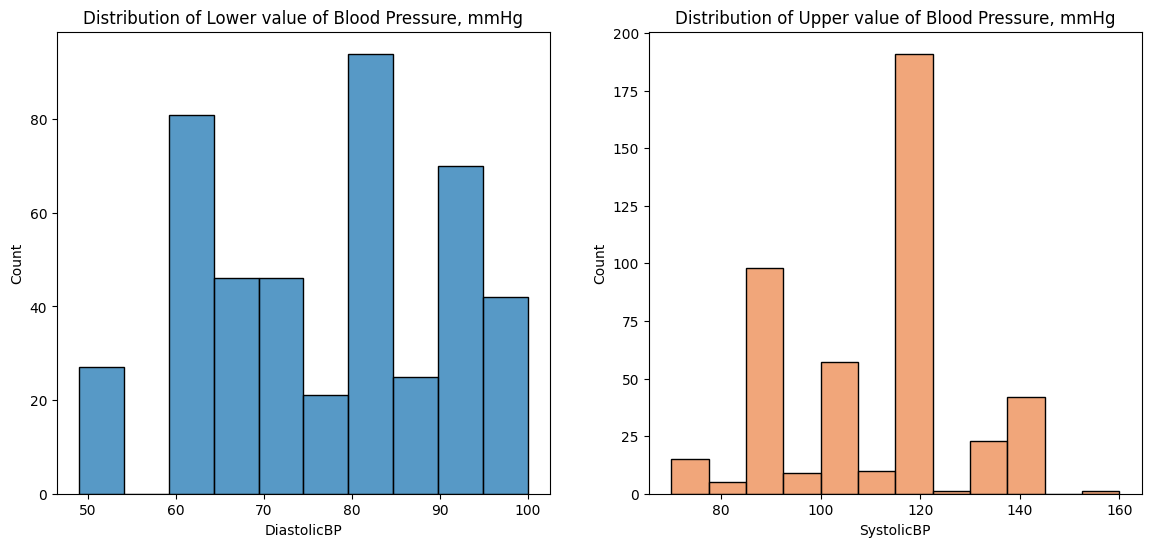

In [94]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.DiastolicBP)
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg")

sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e")
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg");

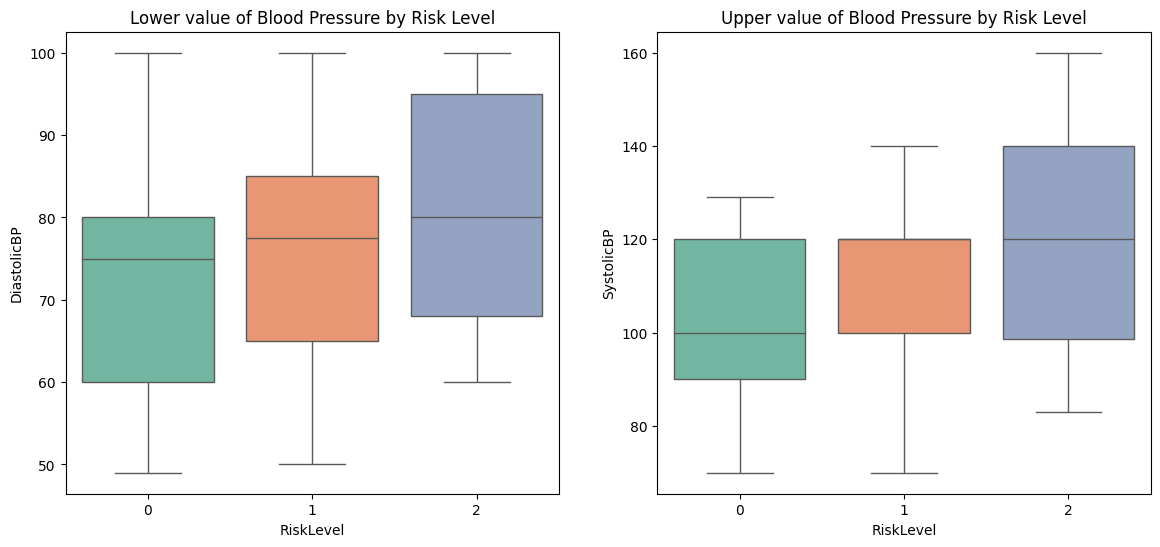

In [95]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP, palette='Set2')
axes[0].set_title("Lower value of Blood Pressure by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP, palette='Set2')
axes[1].set_title("Upper value of Blood Pressure by Risk Level");

1. Higher blood pressure both systolic and diastolic,  are associated with higher risk pregnancies.

2. Distribution of lower value of blood pressure is more spread, around 60-100 mmHg, compared to distribution of upper value, which is centered around 120 mmHg.

Body Temperature Column

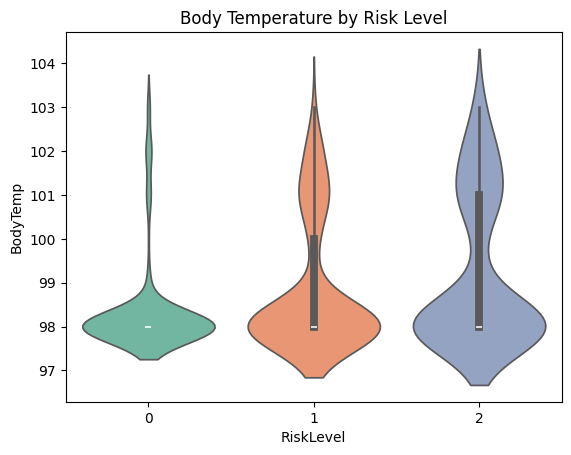

In [96]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel, palette='Set2').set_title("Body Temperature by Risk Level");

From The observation, higher body temperature are associated with higher risk pregnancies.

Heart Rate Column

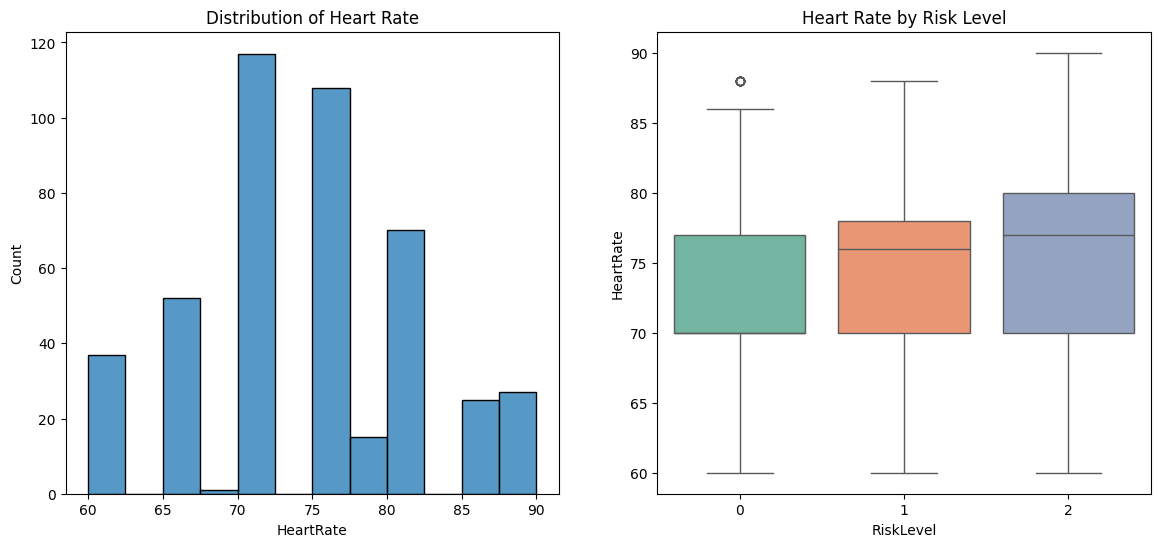

In [97]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate, palette='Set2')
axes[1].set_title("Heart Rate by Risk Level");

Looking For Correlations

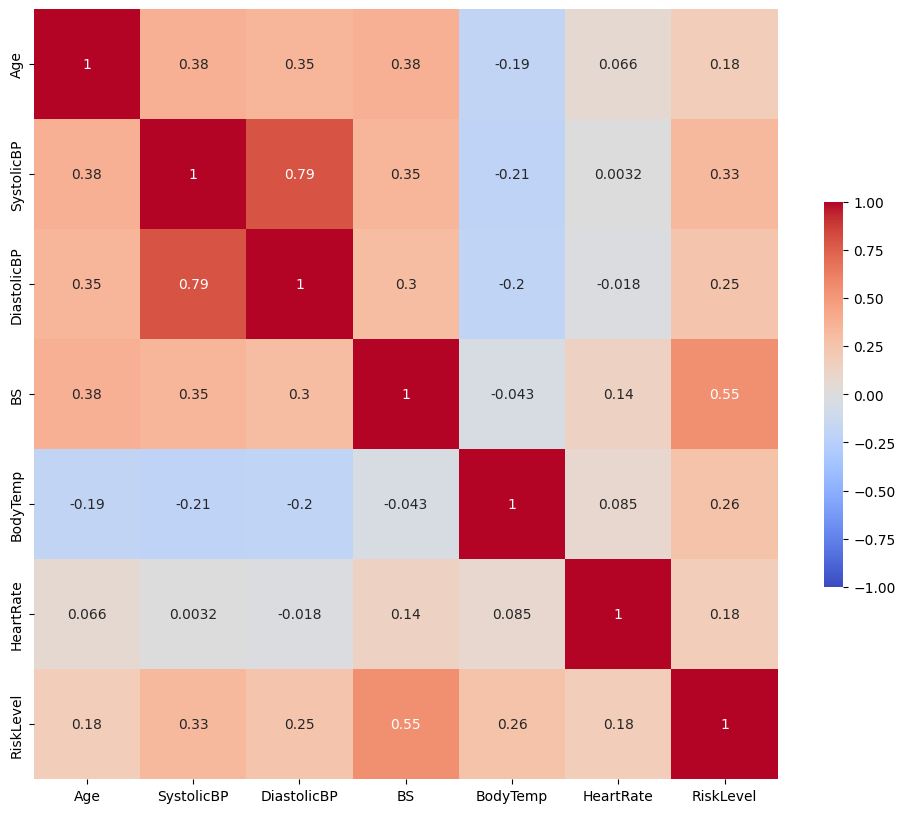

In [98]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, center=0, cbar_kws={"shrink": .5});

**Data Preprocessing**

Separate features and the target by setting  variable X equal to the numerical features and a variable y equal to the "RiskLevel" column which is the target.

In [99]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [109]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [110]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [111]:
# Initialize Random Forest Classifier with complex parameters
rf_model = RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    max_depth=30,
    min_samples_leaf=5,
    #max_features='sqrt',
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7252747252747253
F1 Score: 0.6795819485043848
Precision: 0.7371550018608842
Recall: 0.7252747252747253


Random Forest

Confusion Matrix:

[[46  1  0]
 [17  6  3]
 [ 3  1 14]]

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.98      0.81        47
           1       0.75      0.23      0.35        26
           2       0.82      0.78      0.80        18

    accuracy                           0.73        91
   macro avg       0.76      0.66      0.66        91
weighted avg       0.74      0.73      0.68        91



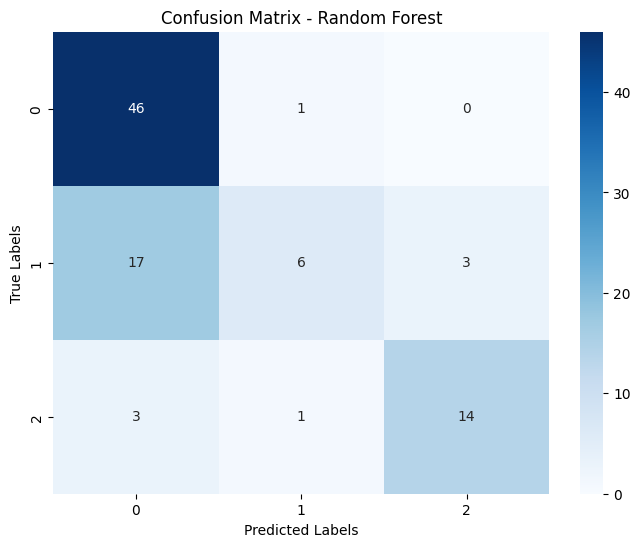

In [103]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Print metrics
print('Random Forest')
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # Or manually set: labels = ['Low', 'Moderate', 'High']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [112]:
import os
import joblib
os.makedirs("model", exist_ok=True)

# Save the model using joblib
joblib.dump(rf_model, "model/model.pkl")
print("\n✅ Model saved to 'model/model.pkl'")



✅ Model saved to 'model/model.pkl'


Accuracy: 0.7142857142857143
F1 Score: 0.6638749721456488
Precision: 0.7255048977110937
Recall: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.96      0.79        47
           1       0.71      0.19      0.30        26
           2       0.88      0.83      0.86        18

    accuracy                           0.71        91
   macro avg       0.76      0.66      0.65        91
weighted avg       0.73      0.71      0.66        91



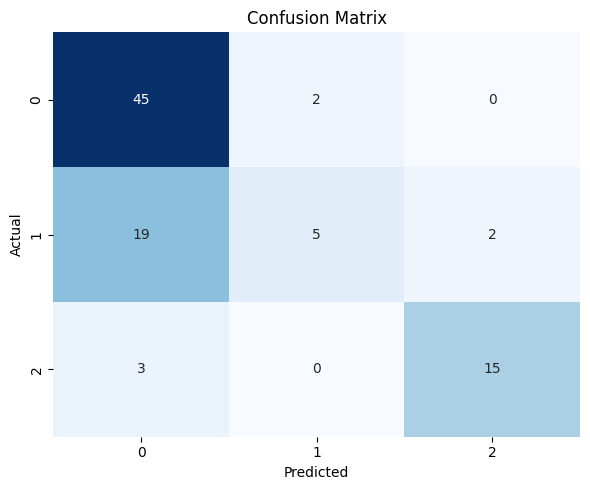

In [104]:
# Initialize the XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
    )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Plot ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [105]:
import numpy as np
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

In [106]:
# Build the neural network model

NN_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    #Dropout(0.1),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax'),
])

# Compile the model
NN_model.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


NN_model.summary()
# Train the model (using 20% of the training data for validation)
history = NN_model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on the test set
y_pred_prob = NN_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,227 (47.76 KB)

 Trainable params: 11,779 (46.01 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.4495 - loss: 1.2690 - val_accuracy: 0.6712 - val_loss: 0.9239
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6195 - loss: 1.0545 - val_accuracy: 0.6712 - val_loss: 0.8614
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7039 - loss: 0.8080 - val_accuracy: 0.6712 - val_loss: 0.8403
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7113 - loss: 0.7271 - val_accuracy: 0.6712 - val_loss: 0.8281
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7198 - loss: 0.6749 - val_accuracy: 0.6712 - val_loss: 0.8199
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7507 - loss: 0.6126 - val_accuracy: 0.6712 - val_loss: 0.8069
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7201 - loss: 0.6743 - val_accuracy: 0.6849 - val_loss: 0.7928
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7631 - loss: 0.5859 - val_accuracy: 0.6712 - val_loss: 0.7742

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Accuracy: 0.6923076923076923
F1 Score: 0.6068082293646204
Precision: 0.7764623436265228
Recall: 0.6923076923076923



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.96      0.79        47
           1       1.00      0.08      0.14        26
           2       0.73      0.89      0.80        18

    accuracy                           0.69        91
   macro avg       0.80      0.64      0.58        91
weighted avg       0.78      0.69      0.61        91



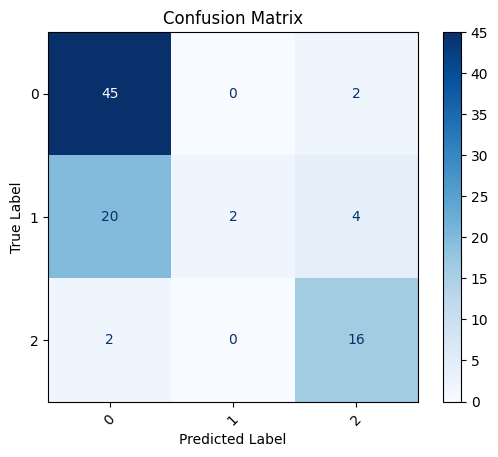

In [107]:
# create a confusion matrix  for the model
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
# add labels to the confusion matrix
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45)
disp.ax_.set_yticklabels(disp.ax_.get_yticklabels(), rotation=0)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Predictions**